In [26]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as Data

In [6]:
net1 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1),
)
print(net1)
optimizer = torch.optim.SGD(net1.parameters(),lr = 0.5)
loss_func = torch.nn.MSELoss()

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [8]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

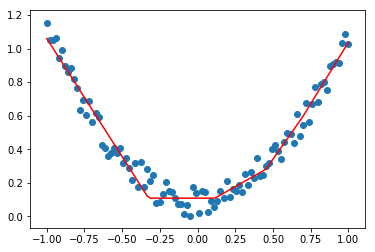

In [19]:
for t in range(100):
    prediction = net1(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.scatter(x.numpy(),y.numpy())
plt.plot(x.numpy(),prediction.data.numpy(),'r-')
torch.save(net1,"net.pkl")
torch.save(net1.state_dict(),"net_params.pkl")

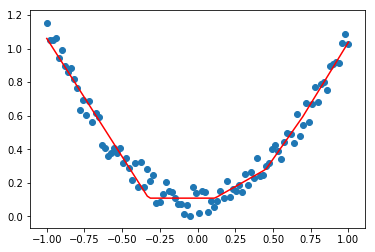

In [23]:
def restore_net():
    net2 = torch.load("net.pkl")
    prediction = net2(x)
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),prediction.data.numpy(),'r-')   
restore_net()

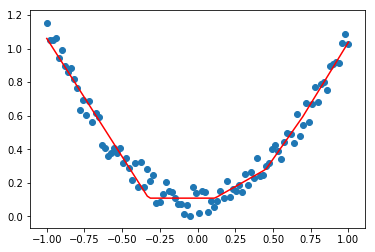

In [25]:
def restore_params():
    net3 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1),
    )
    net3.load_state_dict(torch.load("net_params.pkl"))
    prediction = net3(x)
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),prediction.data.numpy(),'r-')   
restore_params()

In [36]:
BATCH_SIZE = 8
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)
for epoch in range(3):
    for step,(batch_x,batch_y)in enumerate(loader):
        print(batch_x.numpy())
        print(batch_y.numpy())
        

[ 4.  3.  7.  5. 10.  8.  1.  6.]
[ 7.  8.  4.  6.  1.  3. 10.  5.]
[2. 9.]
[9. 2.]
[ 2.  5.  9. 10.  7.  4.  1.  6.]
[ 9.  6.  2.  1.  4.  7. 10.  5.]
[8. 3.]
[3. 8.]
[ 3.  1.  7.  9.  2.  6. 10.  5.]
[ 8. 10.  4.  2.  9.  5.  1.  6.]
[4. 8.]
[7. 3.]


In [39]:
#hyper parameters
LR= 0.01
EPOCH = 12
BATCH_SIZE = 32



In [71]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [72]:
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

In [57]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

        

<class '__main__.Net'>


In [50]:
netSGD = Net()
netMomentum = Net()
netRMSprop = Net()
netAdam = Net()
nets = [netSGD,netMomentum,netRMSprop,netAdam]
opt_SGD = torch.optim.SGD(netSGD.parameters(),lr = LR)
opt_Momentum = torch.optim.SGD(netMomentum.parameters(),lr = LR,momentum = 0.8)
opt_RMSprop = torch.optim.RMSprop(netRMSprop.parameters(),lr = LR,alpha = 0.9)
opt_Adam = torch.optim.Adam(netAdam.parameters(),lr = LR,betas=(0.9,0.99))
optimizers = [opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]
loss_func = torch.nn.MSELoss()
losses_his=[[],[],[],[]]


In [77]:
for epoch in range(EPOCH):
    print(epoch)
    for step,(batch_x,batch_y)in enumerate(loader):
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output = net(Variable(batch_x))
            loss = loss_func(output,batch_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data)


0
1
2
3
4
5
6
7
8
9
10
11


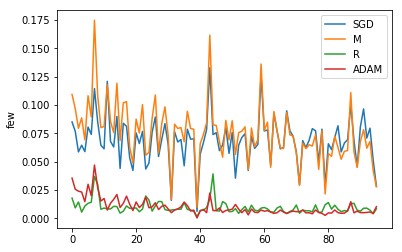

In [87]:
labels = ["SGD","M","R","ADAM"]
for i,his in enumerate(losses_his):
    plt.plot(his,label = labels[i])
plt.ylabel("few")
plt.legend(loc = "best")
plt.show()

In [88]:
line = "1 2 3 4 5"
words = line.split() + ["<EOS>"]
print(words)

['1', '2', '3', '4', '5', '<EOS>']
